In [1]:
import pandas as pd

In [2]:
leases = pd.read_csv('../Datasets/Leases.csv')
pd.set_option('display.max_columns', None)
print(leases.columns.tolist())
leases.head()


['year', 'quarter', 'monthsigned', 'market', 'building_name', 'building_id', 'address', 'region', 'city', 'state', 'zip', 'internal_submarket', 'internal_class', 'leasedSF', 'company_name', 'internal_industry', 'transaction_type', 'internal_market_cluster', 'costarID', 'space_type', 'CBD_suburban', 'RBA', 'available_space', 'availability_proportion', 'internal_class_rent', 'overall_rent', 'direct_available_space', 'direct_availability_proportion', 'direct_internal_class_rent', 'direct_overall_rent', 'sublet_available_space', 'sublet_availability_proportion', 'sublet_internal_class_rent', 'sublet_overall_rent', 'leasing']


,year,quarter,monthsigned,market,building_name,building_id,address,region,city,state,zip,internal_submarket,internal_class,leasedSF,company_name,internal_industry,transaction_type,internal_market_cluster,costarID,space_type,CBD_suburban,RBA,available_space,availability_proportion,internal_class_rent,overall_rent,direct_available_space,direct_availability_proportion,direct_internal_class_rent,direct_overall_rent,sublet_available_space,sublet_availability_proportion,sublet_internal_class_rent,sublet_overall_rent,leasing
0,2018,Q1,1.0,Atlanta,10 Glenlake North Tower,Atlanta_Central Perimeter_Atlanta_10 Glenlake ...,10 Glenlake Pky NE,South,Atlanta,GA,30328.0,Central Perimeter,A,24736.0,Capital Investment Advisors,Financial Services and Insurance,Expansion,NaN,445509,Relet,Suburban,101140416.0,20239067.0,0.200109,27.655891,24.345689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1205126.0
1,2018,Q1,1.0,Atlanta,100 City View,Atlanta_Northwest_Atlanta_100 City View_3330 C...,3330 Cumberland Blvd,South,Atlanta,GA,30339.0,Northwest,A,965.0,NaN,NaN,New,NaN,436994,Relet,Suburban,101140416.0,20239067.0,0.200109,27.655891,24.345689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1205126.0
2,2018,Q1,1.0,Atlanta,1000 Parkwood,Atlanta_Northwest_Atlanta_1000 Parkwood_1000 P...,1000 Parkwood Cir SE,South,Atlanta,GA,30339.0,Northwest,A,2215.0,Efc Moen,NaN,New,NaN,434890,Relet,Suburban,101140416.0,20239067.0,0.200109,27.655891,24.345689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1205126.0
3,2018,Q1,1.0,Atlanta,1100 Circle 75,Atlanta_Northwest_Atlanta_1100 Circle 75_1100 ...,1100 Circle 75 Pky SE,South,Atlanta,GA,30339.0,Northwest,O,1925.0,NaN,NaN,New,NaN,434720,Relet,Suburban,65810449.0,12728989.0,0.193419,18.560886,24.345689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,715742.0
4,2018,Q1,1.0,Atlanta,1200 Ashwood,Atlanta_Central Perimeter_Atlanta_1200 Ashwood...,1200 Ashwood Pky,South,Atlanta,GA,30338.0,Central Perimeter,A,2404.0,NaN,NaN,New,NaN,437562,Relet,Suburban,101140416.0,20239067.0,0.200109,27.655891,24.345689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1205126.0


In [3]:
null_counts = leases.isnull().sum()

# Print the result
print(null_counts)

year                                   0
quarter                                0
monthsigned                          863
market                                 0
building_name                      36686
building_id                            0
address                                0
region                                 0
city                                   0
state                                  0
zip                                    1
internal_submarket                     0
internal_class                         9
leasedSF                               0
company_name                      157469
internal_industry                 168284
transaction_type                     539
internal_market_cluster           118847
costarID                               0
space_type                          7545
CBD_suburban                           0
RBA                                49144
available_space                    49144
availability_proportion            49144
internal_class_r

In [4]:


len(leases['company_name'].unique())

28577

In [5]:
leases['internal_industry'].dropna().unique().tolist()

['Financial Services and Insurance',
 'Construction, Engineering and Architecture',
 'Technology, Advertising, Media, and Information',
 'Manufacturing (except Pharmaceutical, Retail, and Computer Tech)',
 'Associations and Non-profit Organizations (except Education and Non-profit Hospitals)',
 'Transportation',
 'Coworking and Executive Suite Companies',
 'Business, Professional, and Consulting Services (except Financial and Legal) - Including Accounting',
 'Education',
 'Legal Services',
 'Real Estate (except coworking providers)',
 'Healthcare',
 'Personal Services and Recreation',
 'Government',
 'Retail',
 'Energy & Utilities',
 'TBD',
 'Pharmaceuticals',
 'Agriculture, Forestry, Fishing, Metal & Mineral Mining',
 'Unclassifiable']

In [6]:
# from geopy.geocoders import Nominatim
import folium
leases['address']

0                        10 Glenlake Pky NE
1                      3330 Cumberland Blvd
2                      1000 Parkwood Cir SE
3                     1100 Circle 75 Pky SE
4                          1200 Ashwood Pky
                        ...                
194680    3111 W Dr Martin Luther King Blvd
194681                         1 Midtown Pl
194682                       400 N Tampa St
194683                      400 N Ashley Dr
194684    3101 W Dr Martin Luther King Blvd
Name: address, Length: 194685, dtype: object

In [7]:
leases['full_address'] = leases['address'] + ', ' + leases['city'] + ', ' + leases['state'] + ' ' + leases['zip'].fillna(0).astype(int).astype(str)

addresses = leases['full_address']
addresses



0                     10 Glenlake Pky NE, Atlanta, GA 30328
1                   3330 Cumberland Blvd, Atlanta, GA 30339
2                   1000 Parkwood Cir SE, Atlanta, GA 30339
3                  1100 Circle 75 Pky SE, Atlanta, GA 30339
4                       1200 Ashwood Pky, Atlanta, GA 30338
                                ...                        
194680    3111 W Dr Martin Luther King Blvd, Tampa, FL 3...
194681                        1 Midtown Pl, Tampa, FL 33607
194682                      400 N Tampa St, Tampa, FL 33602
194683                     400 N Ashley Dr, Tampa, FL 33602
194684    3101 W Dr Martin Luther King Blvd, Tampa, FL 3...
Name: full_address, Length: 194685, dtype: object

In [8]:
# import pandas as pd
# import requests
# import json
# from tqdm import tqdm
# from pathlib import Path

# # Your Geoapify API key
# geoapify_api_key = "7f436ced57704b3bad718286ee333081"

# # Sample DataFrame with addresses (replace this with your actual 'leases' DataFrame)
# # Assuming 'leases' is already defined and contains a column 'full_address'
# sampled_addresses = leases['full_address'].sample(100, random_state=42)

# def geocode_address(address):
#     try:
#         url = f"https://api.geoapify.com/v1/geocode/search?text={address}&apiKey={geoapify_api_key}"
#         response = requests.get(url)
#         if response.status_code == 200:
#             data = response.json()
#             if data["features"]:
#                 coords = data["features"][0]["geometry"]["coordinates"]
#                 return coords[1], coords[0], data["features"][0].get("properties", {})
#             else:
#                 return None, None, {}
#         else:
#             tqdm.write(f"Error: {response.status_code}, {response.text}")
#             return None, None, {}
#     except Exception as e:
#         tqdm.write(f"Exception during geocoding: {e}")
#         return None, None, {}

# # Create output directory if it doesn't exist
# output_dir = Path("geocoded_results")
# output_dir.mkdir(exist_ok=True)

# # Initialize a list to store JSON objects
# json_output = []

# # Geocode addresses and write results incrementally to a JSON file
# output_file = output_dir / "geocoded_results.json"
# with open(output_file, "w") as f:
#     f.write("[")  # Start of JSON array

# for idx, address in enumerate(tqdm(sampled_addresses, desc="Geocoding addresses")):
#     lat, lon, properties = geocode_address(address)
#     entry = {
#         "original_address": address,
#         "latitude": lat,
#         "longitude": lon,
#         "geoapify_response": properties
#     }
#     json_output.append(entry)
    
#     # Write the current entry to the JSON file incrementally
#     with open(output_file, "a") as f:
#         json.dump(entry, f, indent=4)
#         if idx < len(sampled_addresses) - 1:
#             f.write(",\n")
    
#     # Print a concise message showing address, latitude, and longitude
#     tqdm.write(f"Geocoded: {address} -> Lat: {lat}, Lon: {lon}")

# # Close the JSON array in the file
# with open(output_file, "a") as f:
#     f.write("]")  # End of JSON array

# # Optionally convert to DataFrame and save as JSON Lines (one object per line)
# addresses_df = pd.DataFrame(json_output)
# addresses_df.to_json(output_dir / "geocoded_results_lines.json", orient="records", lines=True)

# print(f"\nGeocoding complete. Results saved to {output_file} and as JSON Lines.")


In [9]:
# Write the 'addresses' DataFrame to a JSON file


In [10]:
uszips_df = pd.read_csv('../Datasets/uszips.csv')
print(uszips_df.columns.tolist())
uszips_df.head()




['zip', 'lat', 'lng', 'city', 'state_id', 'state_name', 'zcta', 'parent_zcta', 'population', 'density', 'county_fips', 'county_name', 'county_weights', 'county_names_all', 'county_fips_all', 'imprecise', 'military', 'timezone']


,zip,lat,lng,city,state_id,state_name,zcta,parent_zcta,population,density,county_fips,county_name,county_weights,county_names_all,county_fips_all,imprecise,military,timezone
0,601,18.18027,-66.75266,Adjuntas,PR,Puerto Rico,True,NaN,16721.0,100.2,72001,Adjuntas,"{""72001"": 98.74, ""72141"": 1.26}",Adjuntas|Utuado,72001|72141,False,False,America/Puerto_Rico
1,602,18.36075,-67.17541,Aguada,PR,Puerto Rico,True,NaN,37510.0,477.6,72003,Aguada,"{""72003"": 100}",Aguada,72003,False,False,America/Puerto_Rico
2,603,18.45744,-67.12225,Aguadilla,PR,Puerto Rico,True,NaN,48317.0,543.1,72005,Aguadilla,"{""72005"": 99.76, ""72099"": 0.24}",Aguadilla|Moca,72005|72099,False,False,America/Puerto_Rico
3,606,18.16585,-66.93716,Maricao,PR,Puerto Rico,True,NaN,5435.0,47.3,72093,Maricao,"{""72093"": 82.27, ""72153"": 11.66, ""72121"": 6.06}",Maricao|Yauco|Sabana Grande,72093|72153|72121,False,False,America/Puerto_Rico
4,610,18.29110,-67.12243,Anasco,PR,Puerto Rico,True,NaN,25413.0,264.4,72011,Añasco,"{""72011"": 96.71, ""72099"": 2.82, ""72083"": 0.37,...",Añasco|Moca|Las Marías|Aguada,72011|72099|72083|72003,False,False,America/Puerto_Rico


In [11]:


# Merge with uszips_df to get lat and lng
result = pd.merge(
    leases,
    uszips_df[['zip', 'lat', 'lng']],
    on='zip',
    how='left'
)

# Print results
print(f"Success rate: {result['lat'].notna().mean():.1%}")
print(result[['full_address', 'zip', 'lat', 'lng']].head())
result = result.dropna(subset=['lat', 'lng'])
print(result.columns.tolist())
result.head()


Success rate: 99.6%
                               full_address      zip       lat       lng
0     10 Glenlake Pky NE, Atlanta, GA 30328  30328.0  33.93194 -84.38617
1   3330 Cumberland Blvd, Atlanta, GA 30339  30339.0  33.86786 -84.46483
2   1000 Parkwood Cir SE, Atlanta, GA 30339  30339.0  33.86786 -84.46483
3  1100 Circle 75 Pky SE, Atlanta, GA 30339  30339.0  33.86786 -84.46483
4       1200 Ashwood Pky, Atlanta, GA 30338  30338.0  33.94370 -84.31801
['year', 'quarter', 'monthsigned', 'market', 'building_name', 'building_id', 'address', 'region', 'city', 'state', 'zip', 'internal_submarket', 'internal_class', 'leasedSF', 'company_name', 'internal_industry', 'transaction_type', 'internal_market_cluster', 'costarID', 'space_type', 'CBD_suburban', 'RBA', 'available_space', 'availability_proportion', 'internal_class_rent', 'overall_rent', 'direct_available_space', 'direct_availability_proportion', 'direct_internal_class_rent', 'direct_overall_rent', 'sublet_available_space', 'sublet_ava

,year,quarter,monthsigned,market,building_name,building_id,address,region,city,state,zip,internal_submarket,internal_class,leasedSF,company_name,internal_industry,transaction_type,internal_market_cluster,costarID,space_type,CBD_suburban,RBA,available_space,availability_proportion,internal_class_rent,overall_rent,direct_available_space,direct_availability_proportion,direct_internal_class_rent,direct_overall_rent,sublet_available_space,sublet_availability_proportion,sublet_internal_class_rent,sublet_overall_rent,leasing,full_address,lat,lng
0,2018,Q1,1.0,Atlanta,10 Glenlake North Tower,Atlanta_Central Perimeter_Atlanta_10 Glenlake ...,10 Glenlake Pky NE,South,Atlanta,GA,30328.0,Central Perimeter,A,24736.0,Capital Investment Advisors,Financial Services and Insurance,Expansion,NaN,445509,Relet,Suburban,101140416.0,20239067.0,0.200109,27.655891,24.345689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1205126.0,"10 Glenlake Pky NE, Atlanta, GA 30328",33.93194,-84.38617
1,2018,Q1,1.0,Atlanta,100 City View,Atlanta_Northwest_Atlanta_100 City View_3330 C...,3330 Cumberland Blvd,South,Atlanta,GA,30339.0,Northwest,A,965.0,NaN,NaN,New,NaN,436994,Relet,Suburban,101140416.0,20239067.0,0.200109,27.655891,24.345689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1205126.0,"3330 Cumberland Blvd, Atlanta, GA 30339",33.86786,-84.46483
2,2018,Q1,1.0,Atlanta,1000 Parkwood,Atlanta_Northwest_Atlanta_1000 Parkwood_1000 P...,1000 Parkwood Cir SE,South,Atlanta,GA,30339.0,Northwest,A,2215.0,Efc Moen,NaN,New,NaN,434890,Relet,Suburban,101140416.0,20239067.0,0.200109,27.655891,24.345689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1205126.0,"1000 Parkwood Cir SE, Atlanta, GA 30339",33.86786,-84.46483
3,2018,Q1,1.0,Atlanta,1100 Circle 75,Atlanta_Northwest_Atlanta_1100 Circle 75_1100 ...,1100 Circle 75 Pky SE,South,Atlanta,GA,30339.0,Northwest,O,1925.0,NaN,NaN,New,NaN,434720,Relet,Suburban,65810449.0,12728989.0,0.193419,18.560886,24.345689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,715742.0,"1100 Circle 75 Pky SE, Atlanta, GA 30339",33.86786,-84.46483
4,2018,Q1,1.0,Atlanta,1200 Ashwood,Atlanta_Central Perimeter_Atlanta_1200 Ashwood...,1200 Ashwood Pky,South,Atlanta,GA,30338.0,Central Perimeter,A,2404.0,NaN,NaN,New,NaN,437562,Relet,Suburban,101140416.0,20239067.0,0.200109,27.655891,24.345689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1205126.0,"1200 Ashwood Pky, Atlanta, GA 30338",33.94370,-84.31801


In [12]:
import pandas as pd

# Dictionary mapping quarters to starting months
quarter_to_month = {
    'Q1': 1,  # January
    'Q2': 4,  # April
    'Q3': 7,  # July
    'Q4': 10  # October
}

# Fill missing values in 'monthsigned' using the quarter column
result['monthsigned'] = result.apply(
    lambda row: quarter_to_month[row['quarter']] if pd.isna(row['monthsigned']) else row['monthsigned'],
    axis=1
)

# Convert 'monthsigned' to integer (if not already)
result['monthsigned'] = result['monthsigned'].astype(int)

# Create a new 'time' column as datetime (first day of the month/quarter)
result['time'] = result.apply(lambda row: pd.to_datetime(f"{row['year']}-{row['monthsigned']}-01"), axis=1)

# Optional: Create a numeric column representing time (months since start)
start_year = result['year'].min()
result['time_numeric'] = (result['year'] - start_year) * 12 + result['monthsigned'] - 1

# Display the DataFrame
result


,year,quarter,monthsigned,market,building_name,building_id,address,region,city,state,zip,internal_submarket,internal_class,leasedSF,company_name,internal_industry,transaction_type,internal_market_cluster,costarID,space_type,CBD_suburban,RBA,available_space,availability_proportion,internal_class_rent,overall_rent,direct_available_space,direct_availability_proportion,direct_internal_class_rent,direct_overall_rent,sublet_available_space,sublet_availability_proportion,sublet_internal_class_rent,sublet_overall_rent,leasing,full_address,lat,lng,time,time_numeric
0,2018,Q1,1,Atlanta,10 Glenlake North Tower,Atlanta_Central Perimeter_Atlanta_10 Glenlake ...,10 Glenlake Pky NE,South,Atlanta,GA,30328.0,Central Perimeter,A,24736.0,Capital Investment Advisors,Financial Services and Insurance,Expansion,NaN,445509,Relet,Suburban,101140416.0,20239067.0,0.200109,27.655891,24.345689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1205126.0,"10 Glenlake Pky NE, Atlanta, GA 30328",33.93194,-84.38617,2018-01-01,0
1,2018,Q1,1,Atlanta,100 City View,Atlanta_Northwest_Atlanta_100 City View_3330 C...,3330 Cumberland Blvd,South,Atlanta,GA,30339.0,Northwest,A,965.0,NaN,NaN,New,NaN,436994,Relet,Suburban,101140416.0,20239067.0,0.200109,27.655891,24.345689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1205126.0,"3330 Cumberland Blvd, Atlanta, GA 30339",33.86786,-84.46483,2018-01-01,0
2,2018,Q1,1,Atlanta,1000 Parkwood,Atlanta_Northwest_Atlanta_1000 Parkwood_1000 P...,1000 Parkwood Cir SE,South,Atlanta,GA,30339.0,Northwest,A,2215.0,Efc Moen,NaN,New,NaN,434890,Relet,Suburban,101140416.0,20239067.0,0.200109,27.655891,24.345689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1205126.0,"1000 Parkwood Cir SE, Atlanta, GA 30339",33.86786,-84.46483,2018-01-01,0
3,2018,Q1,1,Atlanta,1100 Circle 75,Atlanta_Northwest_Atlanta_1100 Circle 75_1100 ...,1100 Circle 75 Pky SE,South,Atlanta,GA,30339.0,Northwest,O,1925.0,NaN,NaN,New,NaN,434720,Relet,Suburban,65810449.0,12728989.0,0.193419,18.560886,24.345689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,715742.0,"1100 Circle 75 Pky SE, Atlanta, GA 30339",33.86786,-84.46483,2018-01-01,0
4,2018,Q1,1,Atlanta,1200 Ashwood,Atlanta_Central Perimeter_Atlanta_1200 Ashwood...,1200 Ashwood Pky,South,Atlanta,GA,30338.0,Central Perimeter,A,2404.0,NaN,NaN,New,NaN,437562,Relet,Suburban,101140416.0,20239067.0,0.200109,27.655891,24.345689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1205126.0,"1200 Ashwood Pky, Atlanta, GA 30338",33.94370,-84.31801,2018-01-01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194680,2024,Q4,12,Tampa,Building II,Tampa_Westshore_Tampa_Building II_3111 W Dr Ma...,3111 W Dr Martin Luther King Blvd,South,Tampa,FL,33607.0,Westshore,A,19654.0,WGI,"Construction, Engineering and Architecture",Renewal and Expansion,Hillsborough,389404,NaN,Suburban,25106444.0,5772868.0,0.230000,32.980000,29.460000,4227315.0,0.0779,33.566518,29.801662,1545553.0,0.0285,26.162086,24.797899,770384.0,"3111 W Dr Martin Luther King Blvd, Tampa, FL 3...",27.96677,-82.51408,2024-12-01,83
194681,2024,Q4,12,Tampa,Midtown East,Tampa_Westshore_Tampa_Midtown East_1 Midtown Pl,1 Midtown Pl,South,Tampa,FL,33607.0,Westshore,A,16224.0,Energy Insurance Mutual,NaN,Relocation,Hillsborough,612255,NaN,Suburban,25106444.0,5772868.0,0.230000,32.980000,29.460000,4227315.0,0.0779,33.566518,29.801662,1545553.0,0.0285,26.162086,24.797899,770384.0,"1 Midtown Pl, Tampa, FL 33607",27.96677,-82.51408,2024-12-01,83
194682,2024,Q4,12,Tampa,Park Tower,Tampa_Tampa CBD_Tampa_Park Tower_400 N Tampa St,400 N Tampa St,South,Tampa,FL,33602.0,Tampa CBD,O,8475.0,The Florida Bar,Legal Services,New,Hillsborough,380519,Relet,CBD,29139850.0,4891754.0,0.168000,25.600000,29.460000,3967413.0,0.0731,25.777557,29.801662,924341.0,0.0170,22.768426,24.797899,328947.0,"400 N Tampa St, Tampa, FL 33602",27.95371,-82.45675,2024-12-01,83
194683,2024,Q4,12,Tampa,Rivergate Tower,Tampa_Tampa CBD_Tampa_Rivergate Tower_400 N As...,400 N Ashley Dr,South,Tampa,FL

In [13]:
# import json

# # result = result[:30]

# # Select and rename columns
# json_data = result[
#     ['year', 'quarter', 'building_name', 'building_id', 
#      'company_name', 'lat', 'lng']
# ].rename(columns={
#     'lat': 'latitude',
#     'lng': 'longitude'
# }).dropna(subset=['latitude', 'longitude'])  # Remove rows missing coordinates

# # Replace NaN with None (which will be converted to null in JSON)
# json_data = json_data.where(pd.notnull(json_data), None)

# # # Convert to list of dictionaries
# # json_list = json_data.to_dict(orient='records')

# # # Save to file
# # with open('leasing_data.json', 'w') as f:
# #     json.dump(json_list, f, indent=4)

# # # Or get as JSON string
# # json_output = json.dumps(json_list, indent=4)

# # print(f"Generated {len(json_list)} entries")
# # print("Example entry:")
# # print(json.dumps(json_list[0], indent=4))


In [14]:
#combining unemployment data

import pandas as pd

# Step 1: Load the Unemplyment.csv
unemployment_df = pd.read_csv('../Datasets/Unemployment.csv')

# Step 2: Ensure column names match (e.g., 'monthsigned' -> 'month' if necessary)
# Rename 'monthsigned' in the result dataframe to 'month' for consistency
result = result.rename(columns={'monthsigned': 'month'})

# Step 3: Merge the two dataframes on 'year', 'quarter', 'month', and 'state'
result = pd.merge(result, unemployment_df, 
                       on=['year', 'quarter', 'month', 'state'], 
                       how='left')  # 'left' ensures all rows from result are kept

# Step 4: Check the result
result.head()


,year,quarter,month,market,building_name,building_id,address,region,city,state,zip,internal_submarket,internal_class,leasedSF,company_name,internal_industry,transaction_type,internal_market_cluster,costarID,space_type,CBD_suburban,RBA,available_space,availability_proportion,internal_class_rent,overall_rent,direct_available_space,direct_availability_proportion,direct_internal_class_rent,direct_overall_rent,sublet_available_space,sublet_availability_proportion,sublet_internal_class_rent,sublet_overall_rent,leasing,full_address,lat,lng,time,time_numeric,unemployment_rate
0,2018,Q1,1,Atlanta,10 Glenlake North Tower,Atlanta_Central Perimeter_Atlanta_10 Glenlake ...,10 Glenlake Pky NE,South,Atlanta,GA,30328.0,Central Perimeter,A,24736.0,Capital Investment Advisors,Financial Services and Insurance,Expansion,NaN,445509,Relet,Suburban,101140416.0,20239067.0,0.200109,27.655891,24.345689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1205126.0,"10 Glenlake Pky NE, Atlanta, GA 30328",33.93194,-84.38617,2018-01-01,0,4.3
1,2018,Q1,1,Atlanta,100 City View,Atlanta_Northwest_Atlanta_100 City View_3330 C...,3330 Cumberland Blvd,South,Atlanta,GA,30339.0,Northwest,A,965.0,NaN,NaN,New,NaN,436994,Relet,Suburban,101140416.0,20239067.0,0.200109,27.655891,24.345689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1205126.0,"3330 Cumberland Blvd, Atlanta, GA 30339",33.86786,-84.46483,2018-01-01,0,4.3
2,2018,Q1,1,Atlanta,1000 Parkwood,Atlanta_Northwest_Atlanta_1000 Parkwood_1000 P...,1000 Parkwood Cir SE,South,Atlanta,GA,30339.0,Northwest,A,2215.0,Efc Moen,NaN,New,NaN,434890,Relet,Suburban,101140416.0,20239067.0,0.200109,27.655891,24.345689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1205126.0,"1000 Parkwood Cir SE, Atlanta, GA 30339",33.86786,-84.46483,2018-01-01,0,4.3
3,2018,Q1,1,Atlanta,1100 Circle 75,Atlanta_Northwest_Atlanta_1100 Circle 75_1100 ...,1100 Circle 75 Pky SE,South,Atlanta,GA,30339.0,Northwest,O,1925.0,NaN,NaN,New,NaN,434720,Relet,Suburban,65810449.0,12728989.0,0.193419,18.560886,24.345689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,715742.0,"1100 Circle 75 Pky SE, Atlanta, GA 30339",33.86786,-84.46483,2018-01-01,0,4.3
4,2018,Q1,1,Atlanta,1200 Ashwood,Atlanta_Central Perimeter_Atlanta_1200 Ashwood...,1200 Ashwood Pky,South,Atlanta,GA,30338.0,Central Perimeter,A,2404.0,NaN,NaN,New,NaN,437562,Relet,Suburban,101140416.0,20239067.0,0.200109,27.655891,24.345689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1205126.0,"1200 Ashwood Pky, Atlanta, GA 30338",33.94370,-84.31801,2018-01-01,0,4.3


In [15]:
print(f'result: {result.shape[0]} rows and {result.shape[1]} columns')
print("result null industries: ", result['internal_industry'].isnull().sum())
focused_lease = result[result['leasedSF'] >= 10000]
print(f'focused_lease: {focused_lease.shape[0]} rows and {focused_lease.shape[1]} columns')
print("focused null industries: ", focused_lease['internal_industry'].isnull().sum())
tech_df = focused_lease[focused_lease['internal_industry'] == 'Technology, Advertising, Media, and Information']
print(f'tech_df: {tech_df.shape[0]} rows and {tech_df.shape[1]} columns')

result: 193935 rows and 41 columns
result null industries:  167838
focused_lease: 29484 rows and 41 columns
focused null industries:  12575
tech_df: 2994 rows and 41 columns


/var/folders/7c/0mzvfvqd0yn715h26zd94pmm0000gn/T/ipykernel_10322/3527462082.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  focused_lease['highlight'] = focused_lease['internal_industry'].apply(


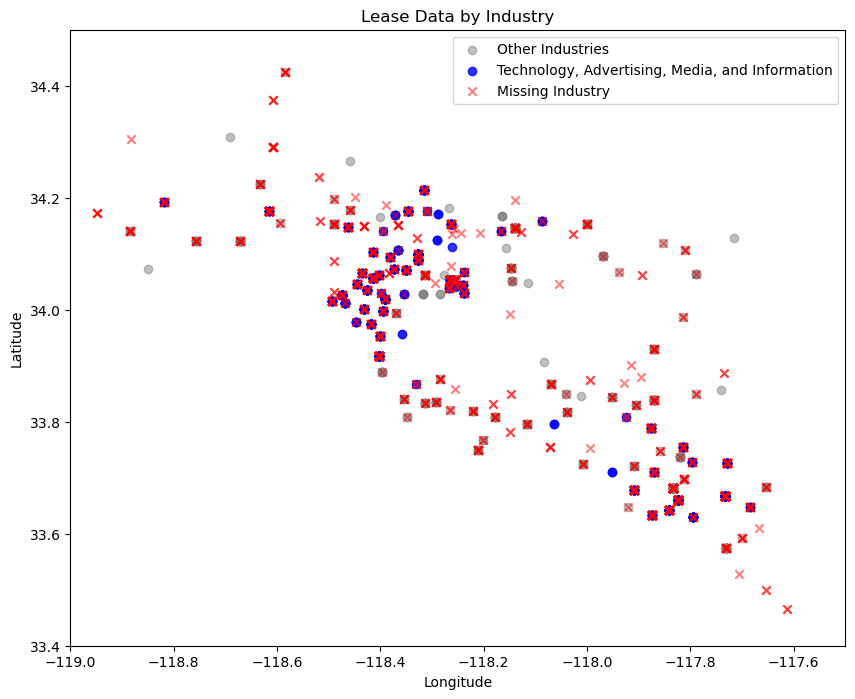

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Specify the industry to highlight
highlight_industry = "Technology, Advertising, Media, and Information"  # Replace with the actual industry name

# Create a new column to classify data as 'highlight', 'other', or 'missing'
focused_lease['highlight'] = focused_lease['internal_industry'].apply(
    lambda x: 'Highlight' if x == highlight_industry else ('Missing' if pd.isna(x) else 'Other')
)

# Create the scatter plot
plt.figure(figsize=(10, 8))

# Plot for other industries
scatter_plot_other = plt.scatter(
    focused_lease.loc[focused_lease['highlight'] == 'Other', 'lng'], 
    focused_lease.loc[focused_lease['highlight'] == 'Other', 'lat'],
    c='gray', alpha=0.5, label='Other Industries'
)

# Plot for the highlighted industry
scatter_plot_highlight = plt.scatter(
    focused_lease.loc[focused_lease['highlight'] == 'Highlight', 'lng'], 
    focused_lease.loc[focused_lease['highlight'] == 'Highlight', 'lat'],
    c='blue', alpha=0.8, label=highlight_industry  # Change color as needed
)

# Plot for missing industries (NaN values)
scatter_plot_missing = plt.scatter(
    focused_lease.loc[focused_lease['highlight'] == 'Missing', 'lng'],
    focused_lease.loc[focused_lease['highlight'] == 'Missing', 'lat'],
    c='red', alpha=0.5, label='Missing Industry', marker='x'  # Red color and 'x' marker for missing industries
)

# Add labels and legend
plt.title('Lease Data by Industry')
plt.xlim(-119, -117.5)
plt.ylim(33.4, 34.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()

# Display the plot
plt.show()

In [17]:
tax18 = pd.read_csv('../taxdata/2018taxdataUS.csv')
tax18['year'] = 2018
tax19 = pd.read_csv('../taxdata/2019taxdataUS.csv')
tax19['year'] = 2019
tax20 = pd.read_csv('../taxdata/2020taxdataUS.csv')
tax20['year'] = 2020
tax21 = pd.read_csv('../taxdata/2021taxdataUS.csv')
tax21['year'] = 2021
tax22 = pd.read_csv('../taxdata/2022taxdataUS.csv')
tax22['year'] = 2022
tax23 = pd.read_csv('../taxdata/2023taxdataUS.csv')
tax23['year'] = 2023
tax24 = pd.read_csv('../taxdata/2024taxdataUS.csv')
tax24['year'] = 2024
alltax = pd.concat([tax18, tax19, tax20, tax21, tax22, tax23, tax24])

alltax['State'] = alltax['State'].fillna(method='ffill')

alltax.head()


/var/folders/7c/0mzvfvqd0yn715h26zd94pmm0000gn/T/ipykernel_10322/3869789584.py:17: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  alltax['State'] = alltax['State'].fillna(method='ffill')


,State,Rates,Unnamed: 2,Brackets,year
0,Ala.,6.50%,>,$0,2018
1,Alaska,0.00%,>,$0,2018
2,Alaska,2.00%,>,"$25,000",2018
3,Alaska,3.00%,>,"$49,000",2018
4,Alaska,4.00%,>,"$74,000",2018


In [18]:
# Step 1: Clean the 'Brackets' column
alltax['Brackets'] = alltax['Brackets'].fillna('').astype(str)  # Replace NaN with empty string and convert to string
alltax['Brackets'] = alltax['Brackets'].str.replace('>', '', regex=False)
alltax['Brackets'] = alltax['Brackets'].str.replace('$', '', regex=False)
alltax['Brackets'] = alltax['Brackets'].str.replace(',', '', regex=False)
alltax['Brackets'] = pd.to_numeric(alltax['Brackets'], errors='coerce')  # Convert to numeric, invalid parsing becomes NaN

# Step 2: Drop rows where 'Brackets' is NaN (optional if you want to exclude such rows)
alltax = alltax.dropna(subset=['Brackets'])

# Step 3: Find the row with the maximum Bracket value for each state and year
highest_bracket = (
    alltax.groupby(['State', 'year'], as_index=False)
    .apply(lambda x: x.loc[x['Brackets'].idxmax()] if not x['Brackets'].isna().all() else None)
    .dropna()  # Drop groups where all values were NaN
)

# Reset index to clean up the DataFrame
highest_bracket = highest_bracket.reset_index(drop=True)

print("Highest tax bracket for each state and year:")
# highest_bracket = highest_bracket.sort_values(by=['year', 'State'])
highest_bracket.head()


Highest tax bracket for each state and year:


/var/folders/7c/0mzvfvqd0yn715h26zd94pmm0000gn/T/ipykernel_10322/2709516935.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.loc[x['Brackets'].idxmax()] if not x['Brackets'].isna().all() else None)


,State,Rates,Unnamed: 2,Brackets,year
0,Ala.,6.50%,>,0.0,2018
1,Ala.,6.50%,>,0.0,2019
2,Ala.,6.50%,>,0.0,2020
3,Ala.,6.50%,>,0.0,2021
4,Ala.,6.50%,>,0.0,2023


In [19]:
state_mapping = {
    'Ala.': 'AL',
    'Alaska': 'AK',
    'Ariz.': 'AZ',
    'Ark.': 'AR',
    'Ark. (a)': 'AR',
    'Arkansas': 'AR',
    'Calif.': 'CA',
    'Calif.\xa0': 'CA',
    'California': 'CA',
    'Colo.': 'CO',
    'Colorado': 'CO',
    'Conn.': 'CT',
    'Conn. (b)': 'CT',
    'Connecticut (a)': 'CT',
    'D.C.': 'DC',
    'Del.': 'DE',
    'Del. (a)': 'DE',
    'Del. (c)': 'DE',
    'Delaware (b)': 'DE',
    'Fla.': 'FL',
    'Fla. (b)': 'FL',
    'Florida': 'FL',
    'Ga.': 'GA',
    'Ga. (b)': 'GA',
    'Ga. (c)': 'GA',
    'Georgia': 'GA',
    'Georgia (c)': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Ill.': 'IL',
    'Ill. (c)': 'IL',
    'Ill. (d)': 'IL',
    'Illinois': 'IL',
    'Illinois (d)': 'IL',
    'Illinois. (d)': 'IL',
    'Ind.': 'IN',
    'Ind. (d)': 'IN',
    'Ind. (e)': 'IN',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Iowa (e)': 'IA',
    'Kans.': 'KS',
    'Kansas': 'KS',
    'Ky.': 'KY',
    'Kentucky': 'KY',
    'La.': 'LA',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Md.': 'MD',
    'Maryland': 'MD',
    'Mass.': 'MA',
    'Massachusetts': 'MA',
    'Mich.': 'MI',
    'Michigan': 'MI',
    'Minn.': 'MN',
    'Minnesota': 'MN',
    'Miss.': 'MS',
    'Miss. (f)': 'MS',
    'Mississippi': 'MS',
    'Mississippi (e)': 'MS',
    'Mo.': 'MO',
    'Mo. (g)': 'MO',
    'Missouri': 'MO',
    'Mont.': 'MT',
    'Montana': 'MT',
    'N.C.': 'NC',
    'North Carolina': 'NC',
    'N.D.': 'ND',
    'North Dakota': 'ND',
    'Nebr.': 'NE',
    'Nebraska': 'NE',
    'N.H.': 'NH',
    'N.H. (g)': 'NH',
    'New Hampshire': 'NH',
    'N.J.': 'NJ',
    'N.J. (f)': 'NJ',
    'N.J. (g)': 'NJ',
    'N.J. (h)': 'NJ',
    'New Jersey': 'NJ',
    'New Jersey (e)': 'NJ',
    'New Jersey (f)': 'NJ',
    'New Mexico': 'NM',
    'N.M.': 'NM',
    'N.M. (g)': 'NM',
    'N.Y.': 'NY',
    'New York': 'NY',
    'Okla.': 'OK',
    'Oklahoma': 'OK',
    'Ore.': 'OR',
    'Ore. (a)': 'OR',
    'Oregon': 'OR',
    'Oregon (a)': 'OR',
    'Oregon (b)': 'OR',
    'Pa.': 'PA',
    'Pennsylvania': 'PA',
    'R.I.': 'RI',
    'Rhode Island': 'RI',
    'S.C.': 'SC',
    'South Carolina': 'SC'
}

highest_bracket['State'] = highest_bracket['State'].replace(state_mapping)
print(highest_bracket.head())

  State  Rates Unnamed: 2  Brackets  year
0    AL  6.50%          >       0.0  2018
1    AL  6.50%          >       0.0  2019
2    AL  6.50%          >       0.0  2020
3    AL  6.50%          >       0.0  2021
4    AL  6.50%          >       0.0  2023


In [20]:
highest_bracket['Rates'] = highest_bracket['Rates'].str.replace('%', '').astype(float)

# Merge the tax rates into focused_lease based on state and year
focused_lease = focused_lease.merge(
    highest_bracket[['State', 'year', 'Rates']],
    left_on=['state', 'year'],
    right_on=['State', 'year'],
    how='left'
)

# Rename the Rates column to tax_rate
focused_lease.rename(columns={'Rates': 'tax_rate'}, inplace=True)

# Drop the redundant 'State' column
focused_lease.drop(columns=['State'], inplace=True)

focused_lease.head()

,year,quarter,month,market,building_name,building_id,address,region,city,state,zip,internal_submarket,internal_class,leasedSF,company_name,internal_industry,transaction_type,internal_market_cluster,costarID,space_type,CBD_suburban,RBA,available_space,availability_proportion,internal_class_rent,overall_rent,direct_available_space,direct_availability_proportion,direct_internal_class_rent,direct_overall_rent,sublet_available_space,sublet_availability_proportion,sublet_internal_class_rent,sublet_overall_rent,leasing,full_address,lat,lng,time,time_numeric,unemployment_rate,highlight,tax_rate
0,2018,Q1,1,Atlanta,10 Glenlake North Tower,Atlanta_Central Perimeter_Atlanta_10 Glenlake ...,10 Glenlake Pky NE,South,Atlanta,GA,30328.0,Central Perimeter,A,24736.0,Capital Investment Advisors,Financial Services and Insurance,Expansion,NaN,445509,Relet,Suburban,101140416.0,20239067.0,0.200109,27.655891,24.345689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1205126.0,"10 Glenlake Pky NE, Atlanta, GA 30328",33.93194,-84.38617,2018-01-01,0,4.3,Other,6.0
1,2018,Q1,1,Atlanta,2 Sun,Atlanta_Northeast_Peachtree Corners_2 Sun_2 Su...,2 Sun Ct,South,Peachtree Corners,GA,30092.0,Northeast,A,13207.0,Kimley-Horn,"Construction, Engineering and Architecture",New,NaN,448077,Relet,Suburban,101140416.0,20239067.0,0.200109,27.655891,24.345689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1205126.0,"2 Sun Ct, Peachtree Corners, GA 30092",33.97145,-84.23537,2018-01-01,0,4.3,Other,6.0
2,2018,Q1,1,Atlanta,271 17th,Atlanta_Midtown_Atlanta_271 17th_271 17th St NW,271 17th St NW,South,Atlanta,GA,30363.0,Midtown,A,15795.0,Square,"Technology, Advertising, Media, and Information",New,NaN,5993371,Relet,CBD,101140416.0,20239067.0,0.200109,27.655891,24.345689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1205126.0,"271 17th St NW, Atlanta, GA 30363",33.79147,-84.39887,2018-01-01,0,4.3,Highlight,6.0
3,2018,Q1,1,Atlanta,500 Northpark,Atlanta_Central Perimeter_Atlanta_500 Northpar...,1100 Abernathy Rd NE,South,Atlanta,GA,30328.0,Central Perimeter,A,12364.0,Trident Fund Services,NaN,New,NaN,441530,Relet,Suburban,101140416.0,20239067.0,0.200109,27.655891,24.345689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1205126.0,"1100 Abernathy Rd NE, Atlanta, GA 30328",33.93194,-84.38617,2018-01-01,0,4.3,Missing,6.0
4,2018,Q1,1,Atlanta,Bank of America Plaza,Atlanta_Downtown_Atlanta_Bank of America Plaza...,600 Peachtree St NE,South,Atlanta,GA,30308.0,Downtown,A,49914.0,Flexport,"Technology, Advertising, Media, and Information",Relocation,NaN,442458,Relet,CBD,101140416.0,20239067.0,0.200109,27.655891,24.345689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1205126.0,"600 Peachtree St NE, Atlanta, GA 30308",33.77094,-84.37773,2018-01-01,0,4.3,Highlight,6.0


In [21]:
result['time_numeric'].describe()
#27 quarters between Q1 2018 and Q4 2024
result.head()



,year,quarter,month,market,building_name,building_id,address,region,city,state,zip,internal_submarket,internal_class,leasedSF,company_name,internal_industry,transaction_type,internal_market_cluster,costarID,space_type,CBD_suburban,RBA,available_space,availability_proportion,internal_class_rent,overall_rent,direct_available_space,direct_availability_proportion,direct_internal_class_rent,direct_overall_rent,sublet_available_space,sublet_availability_proportion,sublet_internal_class_rent,sublet_overall_rent,leasing,full_address,lat,lng,time,time_numeric,unemployment_rate
0,2018,Q1,1,Atlanta,10 Glenlake North Tower,Atlanta_Central Perimeter_Atlanta_10 Glenlake ...,10 Glenlake Pky NE,South,Atlanta,GA,30328.0,Central Perimeter,A,24736.0,Capital Investment Advisors,Financial Services and Insurance,Expansion,NaN,445509,Relet,Suburban,101140416.0,20239067.0,0.200109,27.655891,24.345689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1205126.0,"10 Glenlake Pky NE, Atlanta, GA 30328",33.93194,-84.38617,2018-01-01,0,4.3
1,2018,Q1,1,Atlanta,100 City View,Atlanta_Northwest_Atlanta_100 City View_3330 C...,3330 Cumberland Blvd,South,Atlanta,GA,30339.0,Northwest,A,965.0,NaN,NaN,New,NaN,436994,Relet,Suburban,101140416.0,20239067.0,0.200109,27.655891,24.345689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1205126.0,"3330 Cumberland Blvd, Atlanta, GA 30339",33.86786,-84.46483,2018-01-01,0,4.3
2,2018,Q1,1,Atlanta,1000 Parkwood,Atlanta_Northwest_Atlanta_1000 Parkwood_1000 P...,1000 Parkwood Cir SE,South,Atlanta,GA,30339.0,Northwest,A,2215.0,Efc Moen,NaN,New,NaN,434890,Relet,Suburban,101140416.0,20239067.0,0.200109,27.655891,24.345689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1205126.0,"1000 Parkwood Cir SE, Atlanta, GA 30339",33.86786,-84.46483,2018-01-01,0,4.3
3,2018,Q1,1,Atlanta,1100 Circle 75,Atlanta_Northwest_Atlanta_1100 Circle 75_1100 ...,1100 Circle 75 Pky SE,South,Atlanta,GA,30339.0,Northwest,O,1925.0,NaN,NaN,New,NaN,434720,Relet,Suburban,65810449.0,12728989.0,0.193419,18.560886,24.345689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,715742.0,"1100 Circle 75 Pky SE, Atlanta, GA 30339",33.86786,-84.46483,2018-01-01,0,4.3
4,2018,Q1,1,Atlanta,1200 Ashwood,Atlanta_Central Perimeter_Atlanta_1200 Ashwood...,1200 Ashwood Pky,South,Atlanta,GA,30338.0,Central Perimeter,A,2404.0,NaN,NaN,New,NaN,437562,Relet,Suburban,101140416.0,20239067.0,0.200109,27.655891,24.345689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1205126.0,"1200 Ashwood Pky, Atlanta, GA 30338",33.94370,-84.31801,2018-01-01,0,4.3


In [22]:
#Group transaction types to see if clients 'stayed' or 'relocated'
relocated = {
    'Expansion' : 0,
    'New' : 1,
    'Relocation' : 1,
    'Renewal' : 0,
    'Restructure' : 0,
    'Extension' : 0,
    'TBD' : 0,
    'Renewal and Expansion' : 0,
    'Sale - Leaseback' : 0,
    'nan' : 0
}

focused_lease['relocated'] = focused_lease['transaction_type'].map(relocated)
focused_lease.head()

,year,quarter,month,market,building_name,building_id,address,region,city,state,zip,internal_submarket,internal_class,leasedSF,company_name,internal_industry,transaction_type,internal_market_cluster,costarID,space_type,CBD_suburban,RBA,available_space,availability_proportion,internal_class_rent,overall_rent,direct_available_space,direct_availability_proportion,direct_internal_class_rent,direct_overall_rent,sublet_available_space,sublet_availability_proportion,sublet_internal_class_rent,sublet_overall_rent,leasing,full_address,lat,lng,time,time_numeric,unemployment_rate,highlight,tax_rate,relocated
0,2018,Q1,1,Atlanta,10 Glenlake North Tower,Atlanta_Central Perimeter_Atlanta_10 Glenlake ...,10 Glenlake Pky NE,South,Atlanta,GA,30328.0,Central Perimeter,A,24736.0,Capital Investment Advisors,Financial Services and Insurance,Expansion,NaN,445509,Relet,Suburban,101140416.0,20239067.0,0.200109,27.655891,24.345689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1205126.0,"10 Glenlake Pky NE, Atlanta, GA 30328",33.93194,-84.38617,2018-01-01,0,4.3,Other,6.0,0.0
1,2018,Q1,1,Atlanta,2 Sun,Atlanta_Northeast_Peachtree Corners_2 Sun_2 Su...,2 Sun Ct,South,Peachtree Corners,GA,30092.0,Northeast,A,13207.0,Kimley-Horn,"Construction, Engineering and Architecture",New,NaN,448077,Relet,Suburban,101140416.0,20239067.0,0.200109,27.655891,24.345689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1205126.0,"2 Sun Ct, Peachtree Corners, GA 30092",33.97145,-84.23537,2018-01-01,0,4.3,Other,6.0,1.0
2,2018,Q1,1,Atlanta,271 17th,Atlanta_Midtown_Atlanta_271 17th_271 17th St NW,271 17th St NW,South,Atlanta,GA,30363.0,Midtown,A,15795.0,Square,"Technology, Advertising, Media, and Information",New,NaN,5993371,Relet,CBD,101140416.0,20239067.0,0.200109,27.655891,24.345689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1205126.0,"271 17th St NW, Atlanta, GA 30363",33.79147,-84.39887,2018-01-01,0,4.3,Highlight,6.0,1.0
3,2018,Q1,1,Atlanta,500 Northpark,Atlanta_Central Perimeter_Atlanta_500 Northpar...,1100 Abernathy Rd NE,South,Atlanta,GA,30328.0,Central Perimeter,A,12364.0,Trident Fund Services,NaN,New,NaN,441530,Relet,Suburban,101140416.0,20239067.0,0.200109,27.655891,24.345689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1205126.0,"1100 Abernathy Rd NE, Atlanta, GA 30328",33.93194,-84.38617,2018-01-01,0,4.3,Missing,6.0,1.0
4,2018,Q1,1,Atlanta,Bank of America Plaza,Atlanta_Downtown_Atlanta_Bank of America Plaza...,600 Peachtree St NE,South,Atlanta,GA,30308.0,Downtown,A,49914.0,Flexport,"Technology, Advertising, Media, and Information",Relocation,NaN,442458,Relet,CBD,101140416.0,20239067.0,0.200109,27.655891,24.345689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1205126.0,"600 Peachtree St NE, Atlanta, GA 30308",33.77094,-84.37773,2018-01-01,0,4.3,Highlight,6.0,1.0


In [23]:
numeric_columns = focused_lease.select_dtypes(include=['number']).columns.tolist()

# Print the list of numeric columns
print("Numeric columns:")



numeric_columns

Numeric columns:


['year',
 'month',
 'zip',
 'leasedSF',
 'costarID',
 'RBA',
 'available_space',
 'availability_proportion',
 'internal_class_rent',
 'overall_rent',
 'direct_available_space',
 'direct_availability_proportion',
 'direct_internal_class_rent',
 'direct_overall_rent',
 'sublet_available_space',
 'sublet_availability_proportion',
 'sublet_internal_class_rent',
 'sublet_overall_rent',
 'leasing',
 'lat',
 'lng',
 'time_numeric',
 'unemployment_rate',
 'tax_rate',
 'relocated']

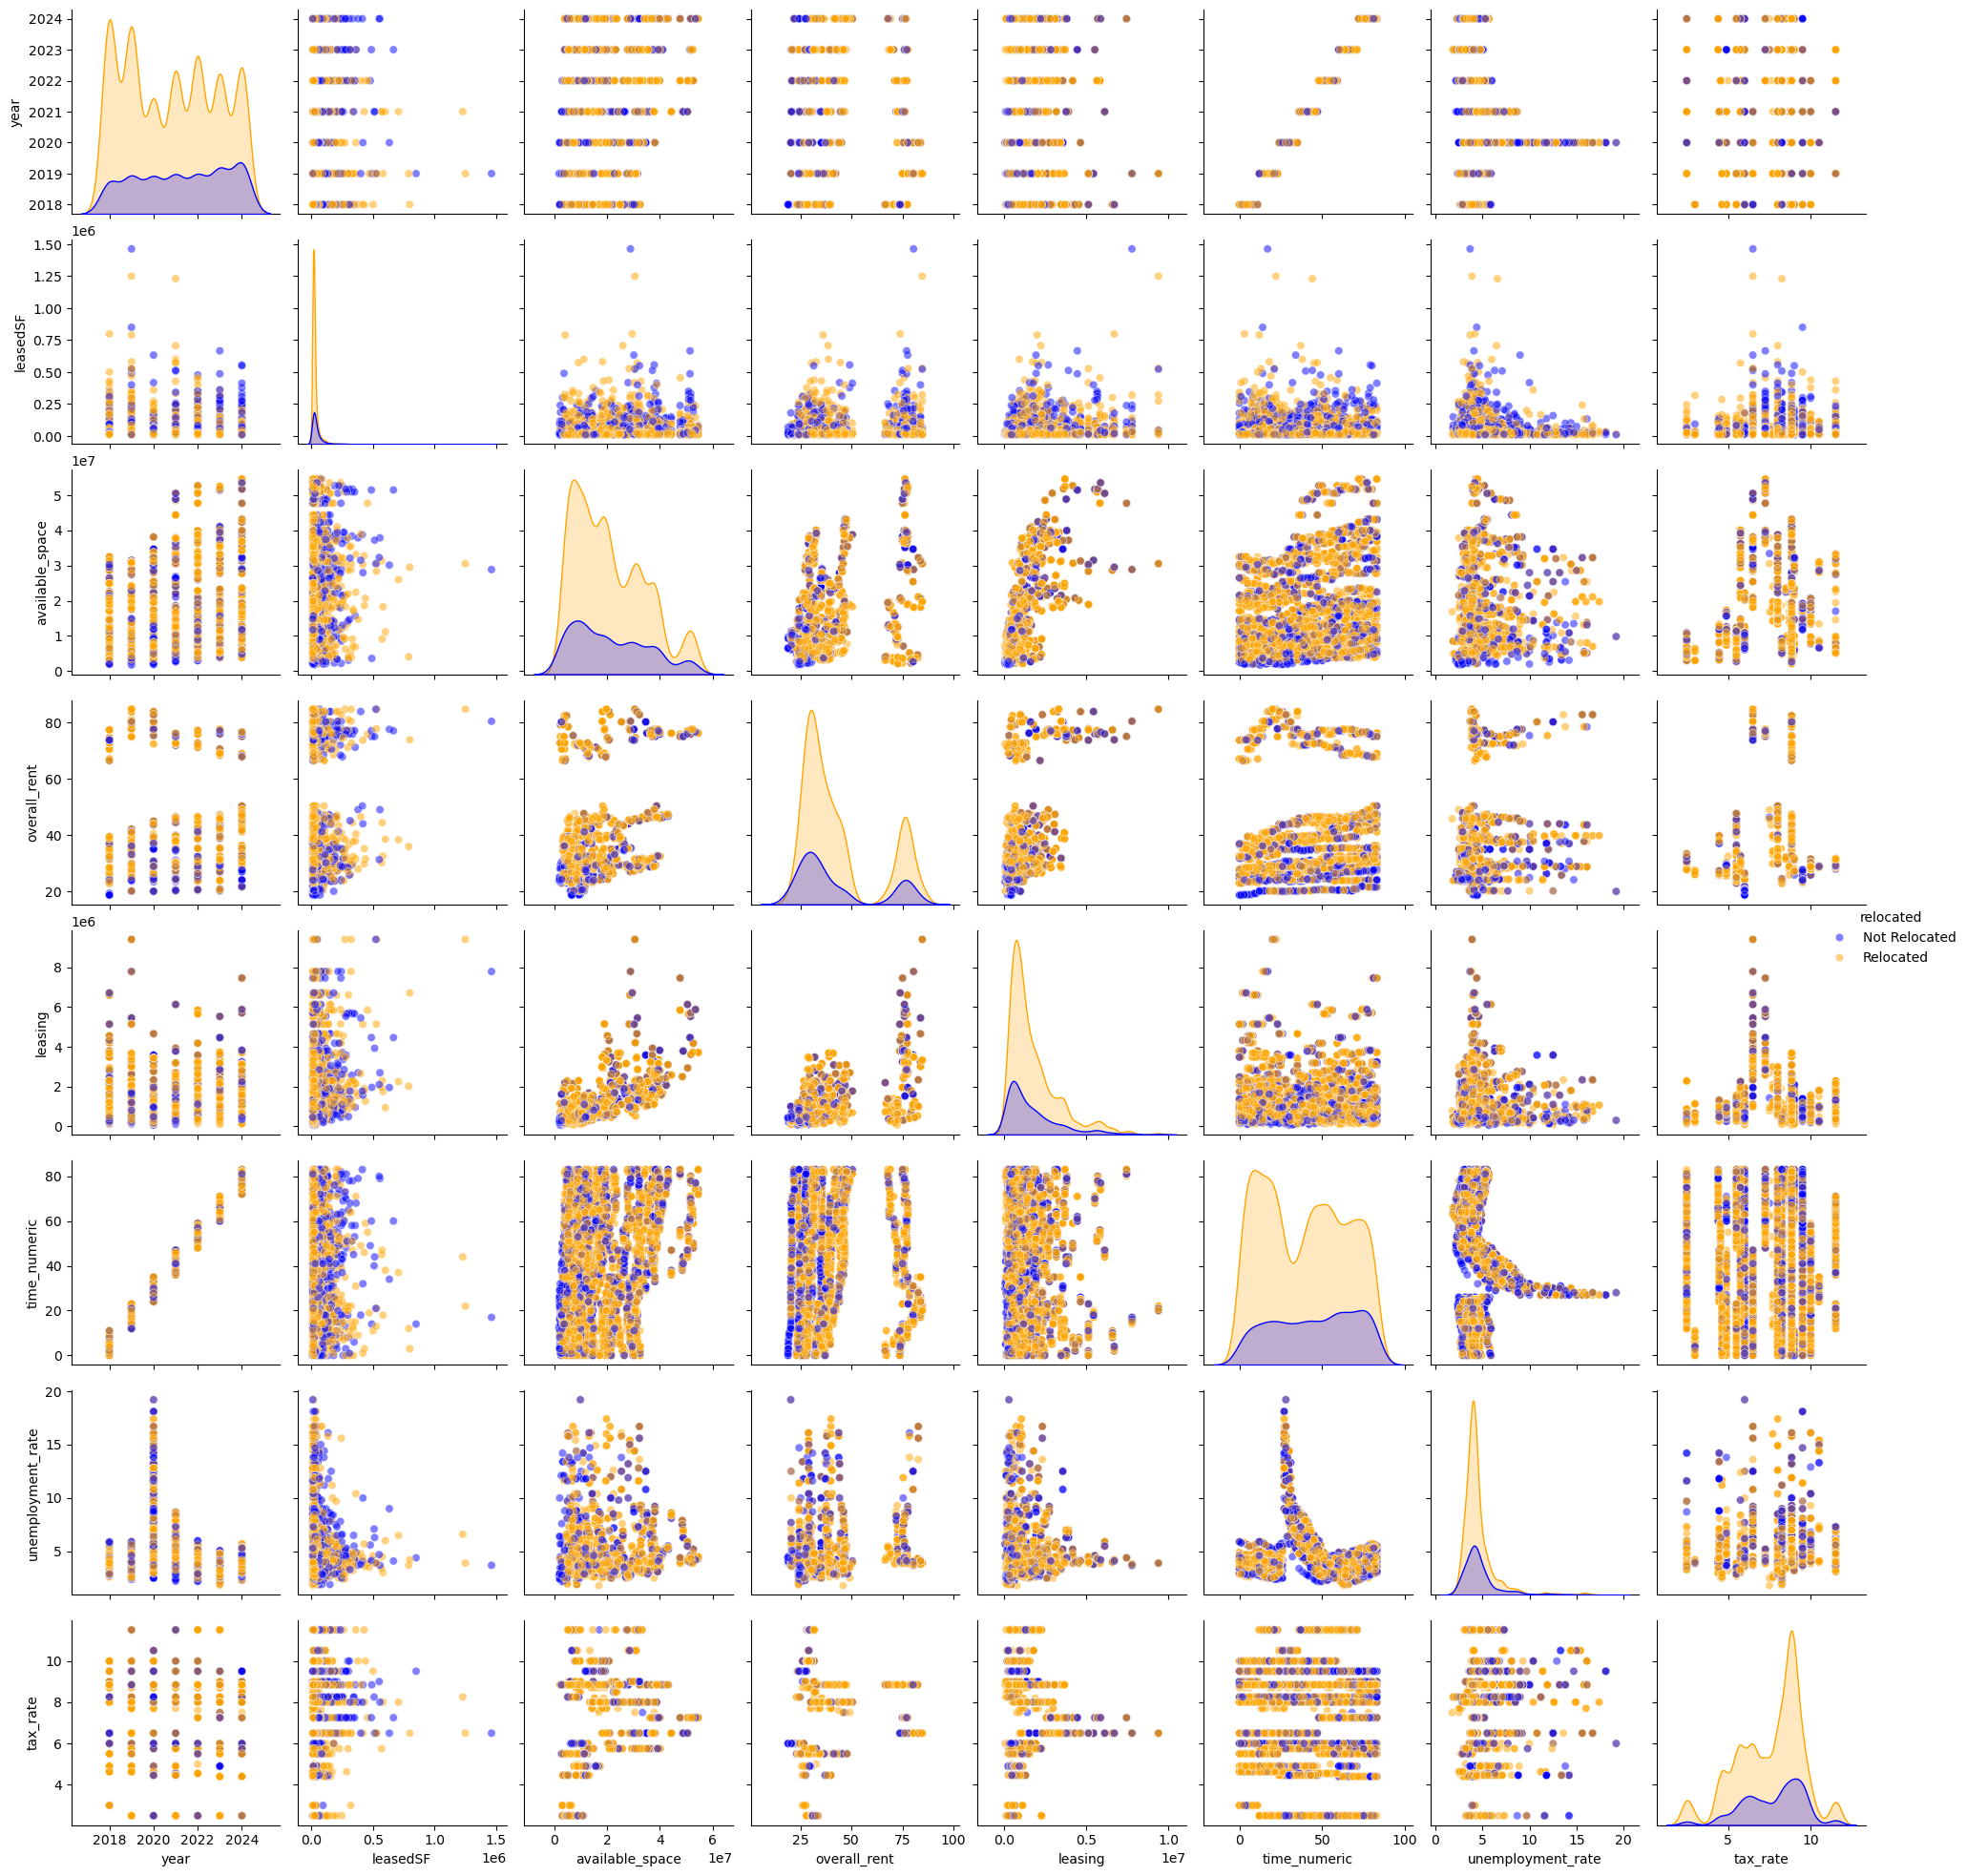

In [24]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have the numeric_columns as already identified
include_columns = [
    'year',  # Useful for trend analysis over time
    'leasedSF',  # Square footage leased - key metric in real estate
    #'RBA',  # Rentable Building Area
    'available_space',  # Available space for lease
    #'availability_proportion',  # Proportion of available space
    #'internal_class_rent',  # Internal rent for specific classes
    'overall_rent',  # Overall rent for the space
    'leasing',  # Leasing activity, representing contracts
    'time_numeric',  # Converted time (numeric) for trend analysis
    'unemployment_rate',  # External economic indicator
    #'lat',  # Latitude for geospatial analysis
    #'lng',  # Longitude for geospatial analysis
    'relocated',  # Binary indicator for relocation
    'tax_rate'
]

# Downsample data for better performance (if necessary)
focused_sample = focused_lease.sample(n=10000, random_state=42)[include_columns]

# Create a pairplot with hue set to 'relocated'
pairplot = sns.pairplot(
    focused_sample,
    hue='relocated',
    palette={0: 'blue', 1: 'orange'},  # Custom colors for relocated status
    diag_kind='kde',  # Use KDE plots on the diagonal
    plot_kws={'alpha': 0.5}  # Transparency for scatterplots
)

# Customize the legend labels to make them more meaningful
for text, label in zip(pairplot._legend.texts, ['Not Relocated', 'Relocated']):
    text.set_text(label)

# Show the plot with the updated legend
plt.show()



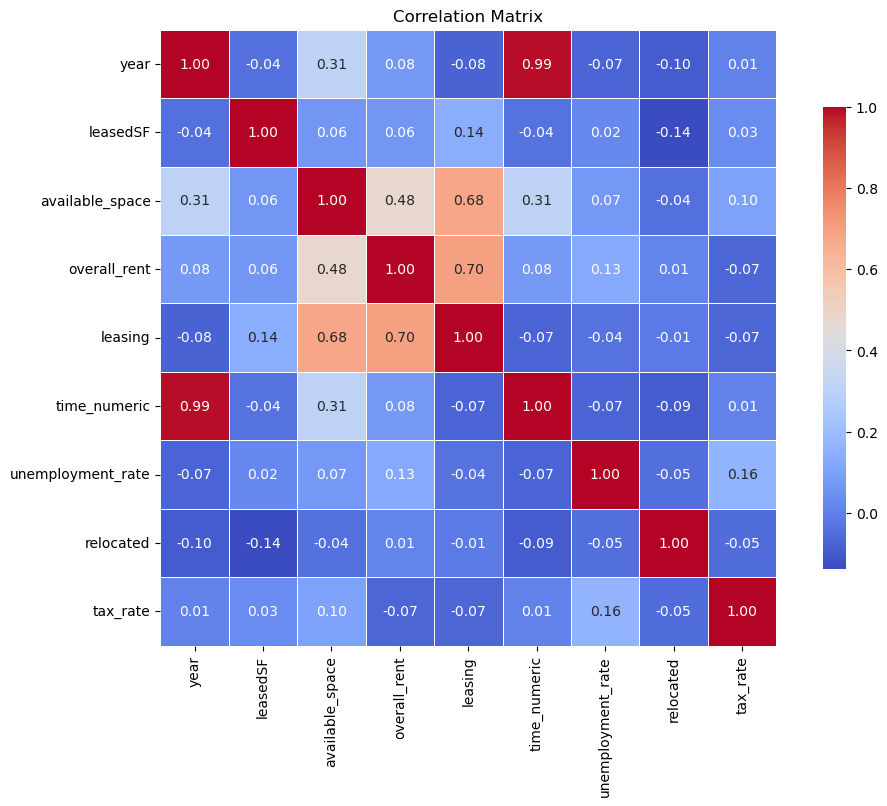

In [25]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have the numeric_columns as already identified
numeric_columns = focused_lease.select_dtypes(include=['number']).columns.tolist()

# Create the correlation matrix
correlation_matrix = focused_lease[include_columns].corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))  # Adjust size for better readability
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', 
            linewidths=0.5, cbar_kws={'shrink': 0.75}, square=True)

# Add labels and title
plt.title("Correlation Matrix")
plt.show()


In [26]:
focused_lease.columns.tolist()

['year',
 'quarter',
 'month',
 'market',
 'building_name',
 'building_id',
 'address',
 'region',
 'city',
 'state',
 'zip',
 'internal_submarket',
 'internal_class',
 'leasedSF',
 'company_name',
 'internal_industry',
 'transaction_type',
 'internal_market_cluster',
 'costarID',
 'space_type',
 'CBD_suburban',
 'RBA',
 'available_space',
 'availability_proportion',
 'internal_class_rent',
 'overall_rent',
 'direct_available_space',
 'direct_availability_proportion',
 'direct_internal_class_rent',
 'direct_overall_rent',
 'sublet_available_space',
 'sublet_availability_proportion',
 'sublet_internal_class_rent',
 'sublet_overall_rent',
 'leasing',
 'full_address',
 'lat',
 'lng',
 'time',
 'time_numeric',
 'unemployment_rate',
 'highlight',
 'tax_rate',
 'relocated']

In [27]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # Assuming focused_lease is already loaded and contains columns: 'state', 'year', 'relocated'

# # Group by state and year to count the number of leases
# leases_by_state_time = focused_lease.groupby(['state', 'year']).size().reset_index(name='total_leases')

# # Pivot data for easier plotting
# leases_pivot = leases_by_state_time.pivot(index='year', columns='state', values='total_leases')

# # Plot the total number of leases for each state over time
# plt.figure(figsize=(12, 8))
# for state in leases_pivot.columns:
#     plt.plot(leases_pivot.index, leases_pivot[state], label=state)

# # Highlight COVID period (2020–2021)
# plt.axvspan(2019, 2021, color='gray', alpha=0.2, label='COVID Period')

# # Add labels and legend
# plt.title('Total Number of Leases by State Over Time')
# plt.xlabel('Year')
# plt.ylabel('Number of Leases')
# plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title="States")
# plt.tight_layout()
# plt.yscale('log')

# # Show the plot
# plt.show()


In [28]:
focused_lease['internal_industry'].unique().tolist()

['Financial Services and Insurance',
 'Construction, Engineering and Architecture',
 'Technology, Advertising, Media, and Information',
 nan,
 'Manufacturing (except Pharmaceutical, Retail, and Computer Tech)',
 'Associations and Non-profit Organizations (except Education and Non-profit Hospitals)',
 'Business, Professional, and Consulting Services (except Financial and Legal) - Including Accounting',
 'Education',
 'Legal Services',
 'Personal Services and Recreation',
 'Real Estate (except coworking providers)',
 'Coworking and Executive Suite Companies',
 'Transportation',
 'Government',
 'TBD',
 'Energy & Utilities',
 'Healthcare',
 'Retail',
 'Agriculture, Forestry, Fishing, Metal & Mineral Mining',
 'Unclassifiable',
 'Pharmaceuticals']

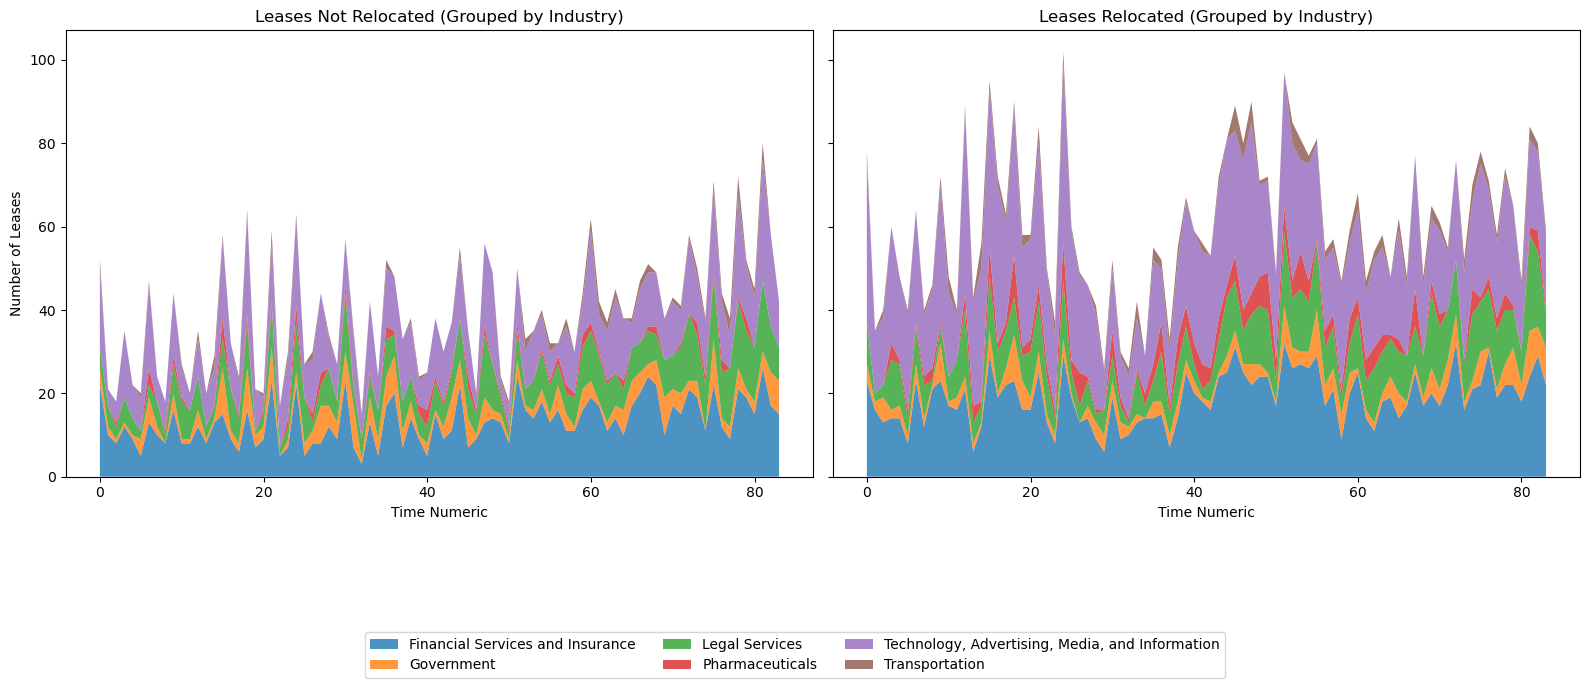

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Load or define your focused_lease DataFrame

# Filter to include only the specified industries
focus_industries = [
    'Technology, Advertising, Media, and Information', 
    'Financial Services and Insurance', 
    'Legal Services', 
    'Pharmaceuticals',
    'Transportation', 
    'Government'
]
filtered_data = focused_lease[focused_lease['internal_industry'].isin(focus_industries)]

# Group data by 'relocated', 'internal_industry', and 'time_numeric' to calculate counts
stacked_data = filtered_data.groupby(['relocated', 'internal_industry', 'time_numeric']).size().reset_index(name='count')

# Pivot the data for easier plotting
stacked_pivot_0 = stacked_data[stacked_data['relocated'] == 0].pivot(index='time_numeric', columns='internal_industry', values='count').fillna(0)
stacked_pivot_1 = stacked_data[stacked_data['relocated'] == 1].pivot(index='time_numeric', columns='internal_industry', values='count').fillna(0)

# Prepare data for stack plots
time_numeric_0 = stacked_pivot_0.index
industries_0 = stacked_pivot_0.columns
values_0 = [stacked_pivot_0[industry] for industry in industries_0]

time_numeric_1 = stacked_pivot_1.index
industries_1 = stacked_pivot_1.columns
values_1 = [stacked_pivot_1[industry] for industry in industries_1]

# Create subplots for side-by-side stack plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Plot stack plot for relocated == 0
axes[0].stackplot(time_numeric_0, *values_0, labels=industries_0, alpha=0.8)
axes[0].set_title('Leases Not Relocated (Grouped by Industry)')
axes[0].set_xlabel('Time Numeric')
axes[0].set_ylabel('Number of Leases')
# axes[0].set_yscale('log')  # Log scale for better visualization

# Plot stack plot for relocated == 1
axes[1].stackplot(time_numeric_1, *values_1, labels=industries_1, alpha=0.8)
axes[1].set_title('Leases Relocated (Grouped by Industry)')
axes[1].set_xlabel('Time Numeric')
# axes[1].set_yscale('log')  # Log scale for better visualization('Number of Leases')

# Add a shared legend below both plots
handles, labels = axes[1].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.15), fontsize=10)

# Adjust layout to make room for the legend
plt.tight_layout(rect=[0, 0.1, 1, 1])  # Leave space at the bottom for the legend

# Show the plot
plt.show()


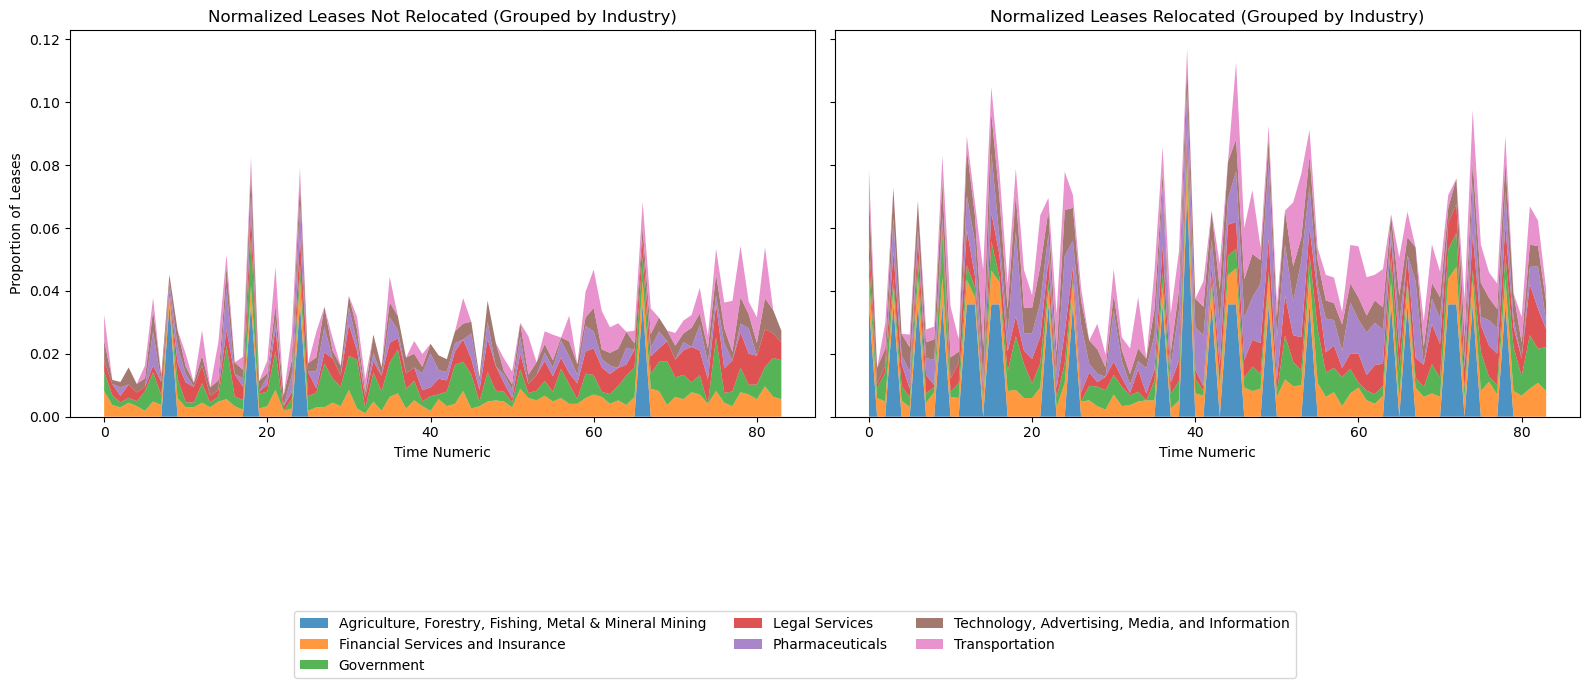

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `focused_lease` contains the original data
focus_industries = [
    'Technology, Advertising, Media, and Information', 
    'Financial Services and Insurance', 
    'Legal Services', 
    'Agriculture, Forestry, Fishing, Metal & Mineral Mining', 
    'Pharmaceuticals',
    'Transportation', 
    'Government'
]

# Filter to include only the specified industries
filtered_data = focused_lease[focused_lease['internal_industry'].isin(focus_industries)]

# Group data by 'relocated', 'internal_industry', and 'time_numeric' to calculate counts
stacked_data = filtered_data.groupby(['relocated', 'internal_industry', 'time_numeric']).size().reset_index(name='count')

# Calculate the total size of each industry (sum of counts across all time periods and relocation statuses)
industry_totals = stacked_data.groupby('internal_industry')['count'].sum().reset_index(name='total_size')

# Merge the total size back into the original data
normalized_data = stacked_data.merge(industry_totals, on='internal_industry')

# Normalize the count by dividing by the total size of the industry
normalized_data['normalized_count'] = normalized_data['count'] / normalized_data['total_size']

# Separate normalized data for relocated == 0 and relocated == 1
normalized_pivot_0 = normalized_data[normalized_data['relocated'] == 0].pivot(index='time_numeric', columns='internal_industry', values='normalized_count').fillna(0)
normalized_pivot_1 = normalized_data[normalized_data['relocated'] == 1].pivot(index='time_numeric', columns='internal_industry', values='normalized_count').fillna(0)

# Prepare data for stack plots
time_numeric_0 = normalized_pivot_0.index
industries_0 = normalized_pivot_0.columns
values_0 = [normalized_pivot_0[industry] for industry in industries_0]

time_numeric_1 = normalized_pivot_1.index
industries_1 = normalized_pivot_1.columns
values_1 = [normalized_pivot_1[industry] for industry in industries_1]

# Create subplots for side-by-side stack plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Plot stack plot for relocated == 0
axes[0].stackplot(time_numeric_0, *values_0, labels=industries_0, alpha=0.8)
axes[0].set_title('Normalized Leases Not Relocated (Grouped by Industry)')
axes[0].set_xlabel('Time Numeric')
axes[0].set_ylabel('Proportion of Leases')

# Plot stack plot for relocated == 1
axes[1].stackplot(time_numeric_1, *values_1, labels=industries_1, alpha=0.8)
axes[1].set_title('Normalized Leases Relocated (Grouped by Industry)')
axes[1].set_xlabel('Time Numeric')

# Add a shared legend below both plots
handles, labels = axes[1].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.15), fontsize=10)

# Adjust layout to make room for the legend
plt.tight_layout(rect=[0, 0.2, 1, 1])  # Leave space at the bottom for the legend

# Show the plot
plt.show()


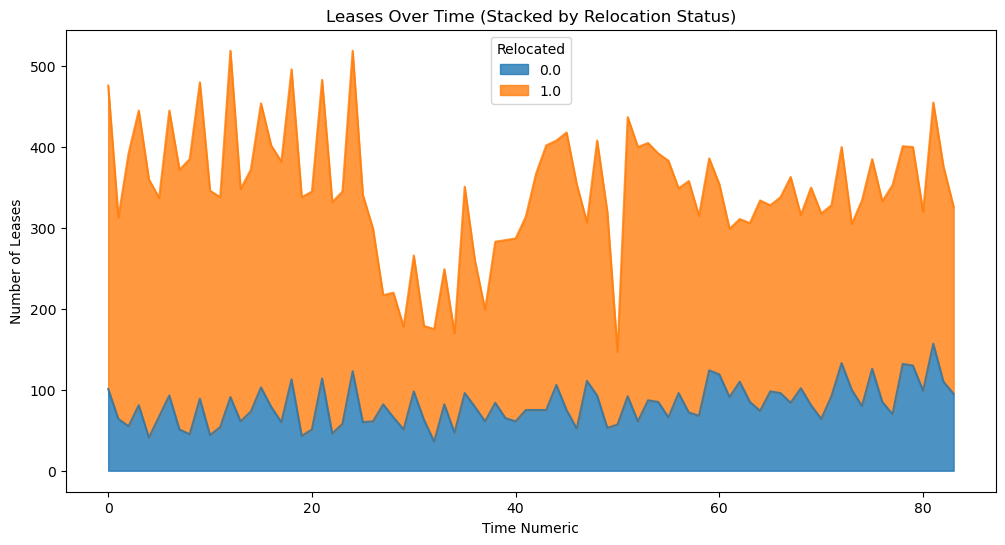

In [31]:
grouped_data = focused_lease.groupby(['time_numeric', 'relocated']).size().unstack()
grouped_data.plot(kind='area', stacked=True, figsize=(12, 6), alpha=0.8)
plt.title('Leases Over Time (Stacked by Relocation Status)')
plt.xlabel('Time Numeric')
plt.ylabel('Number of Leases')
plt.legend(title='Relocated')
plt.show()


In [32]:
import pandas as pd


# Handle missing and non-integer values in 'time_numeric'
focused_lease['time_numeric'] = focused_lease['time_numeric'].fillna(0).round().astype(int)

# Convert 'time_numeric' to datetime (assuming it's months since January 2018)
start_date = pd.Timestamp('2018-01-01')
focused_lease['time'] = focused_lease['time_numeric'].apply(lambda x: start_date + pd.DateOffset(months=x))

# Verify the results
print(focused_lease[['time_numeric', 'time']])
print(focused_lease.columns)


       time_numeric       time
0                 0 2018-01-01
1                 0 2018-01-01
2                 0 2018-01-01
3                 0 2018-01-01
4                 0 2018-01-01
...             ...        ...
29479            83 2024-12-01
29480            83 2024-12-01
29481            83 2024-12-01
29482            83 2024-12-01
29483            83 2024-12-01

[29484 rows x 2 columns]
Index(['year', 'quarter', 'month', 'market', 'building_name', 'building_id',
       'address', 'region', 'city', 'state', 'zip', 'internal_submarket',
       'internal_class', 'leasedSF', 'company_name', 'internal_industry',
       'transaction_type', 'internal_market_cluster', 'costarID', 'space_type',
       'CBD_suburban', 'RBA', 'available_space', 'availability_proportion',
       'internal_class_rent', 'overall_rent', 'direct_available_space',
       'direct_availability_proportion', 'direct_internal_class_rent',
       'direct_overall_rent', 'sublet_available_space',
       'sublet_availab

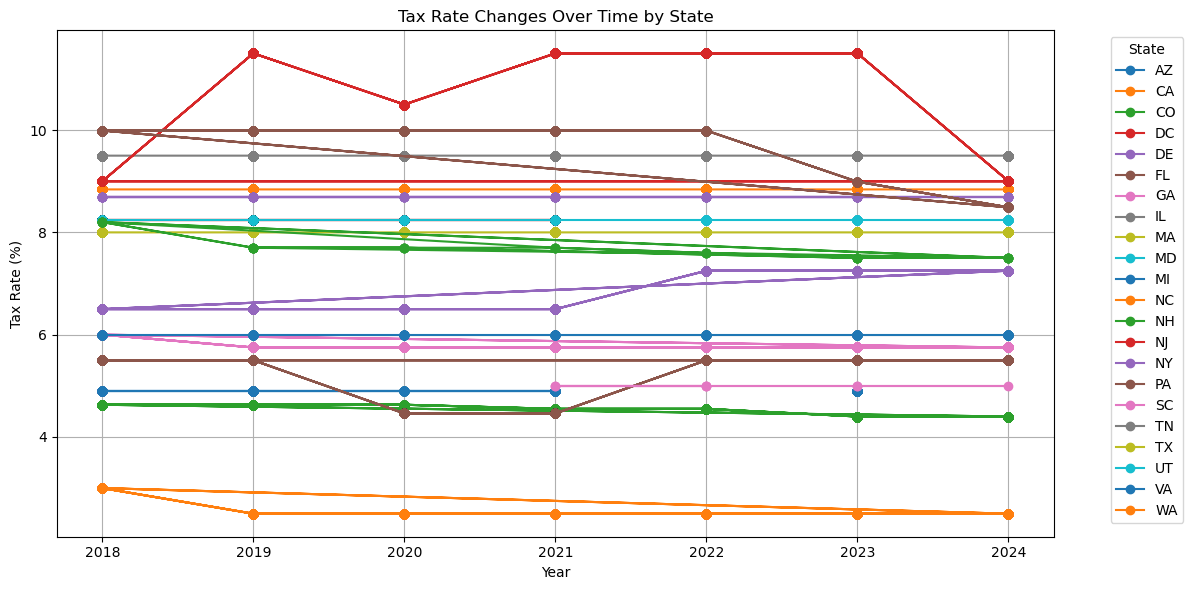

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'focused_lease' DataFrame is already loaded
# Extract relevant columns for plotting
tax_rate_data = focused_lease[['state', 'year', 'tax_rate']]

# Create a line plot to visualize how tax rates changed in different states over time
plt.figure(figsize=(12, 6))

# Group data by state and plot each state's tax rate over time
grouped = tax_rate_data.groupby('state')
for state, data in grouped:
    plt.plot(data['year'], data['tax_rate'], marker='o', label=state)

# Add labels, title, and legend
plt.xlabel('Year')
plt.ylabel('Tax Rate (%)')
plt.title('Tax Rate Changes Over Time by State')
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


In [34]:
import pandas as pd

# Assuming focused_lease DataFrame is already loaded
# Group by company_name and count the number of leases for each company
focused_lease = focused_lease[focused_lease['internal_industry'] != 'Coworking and Executive Suite Companies']
lease_counts = focused_lease.groupby('company_name').size().reset_index(name='lease_count')

# Sort the companies by the number of leases in descending order
lease_counts_sorted = lease_counts.sort_values(by='lease_count', ascending=False)

# Display the top companies with the most leases
lease_counts_sorted.head(10)



,company_name,lease_count
503,Amazon,57
4538,Google,47
11475,Wells Fargo,41
6844,Meta,40
754,Apple,39
10924,Undisclosed,34
7056,Morgan Stanley,31
1200,Bank Of America,28
164,Accenture,26
3113,Deloitte,25


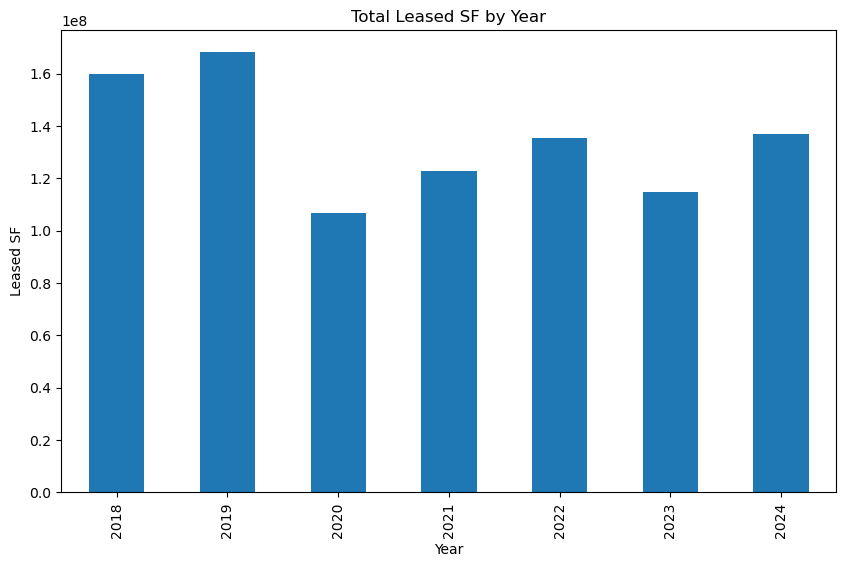

In [35]:
import matplotlib.pyplot as plt

# Example: Total leased square footage by year
lease_trends = focused_lease.groupby('year')['leasedSF'].sum()
lease_trends.plot(kind='bar', figsize=(10, 6), title='Total Leased SF by Year')
plt.xlabel('Year')
plt.ylabel('Leased SF')
plt.show()


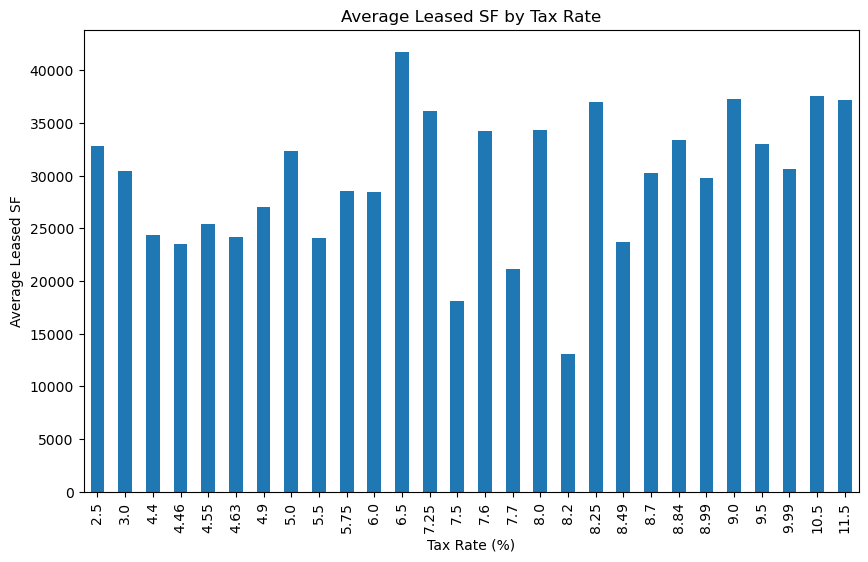

In [36]:
# Example: Average leased square footage by tax rate
tax_vs_leasing = focused_lease.groupby('tax_rate')['leasedSF'].mean()
tax_vs_leasing.plot(kind='bar', figsize=(10, 6), title='Average Leased SF by Tax Rate')
plt.xlabel('Tax Rate (%)')
plt.ylabel('Average Leased SF')
plt.show()


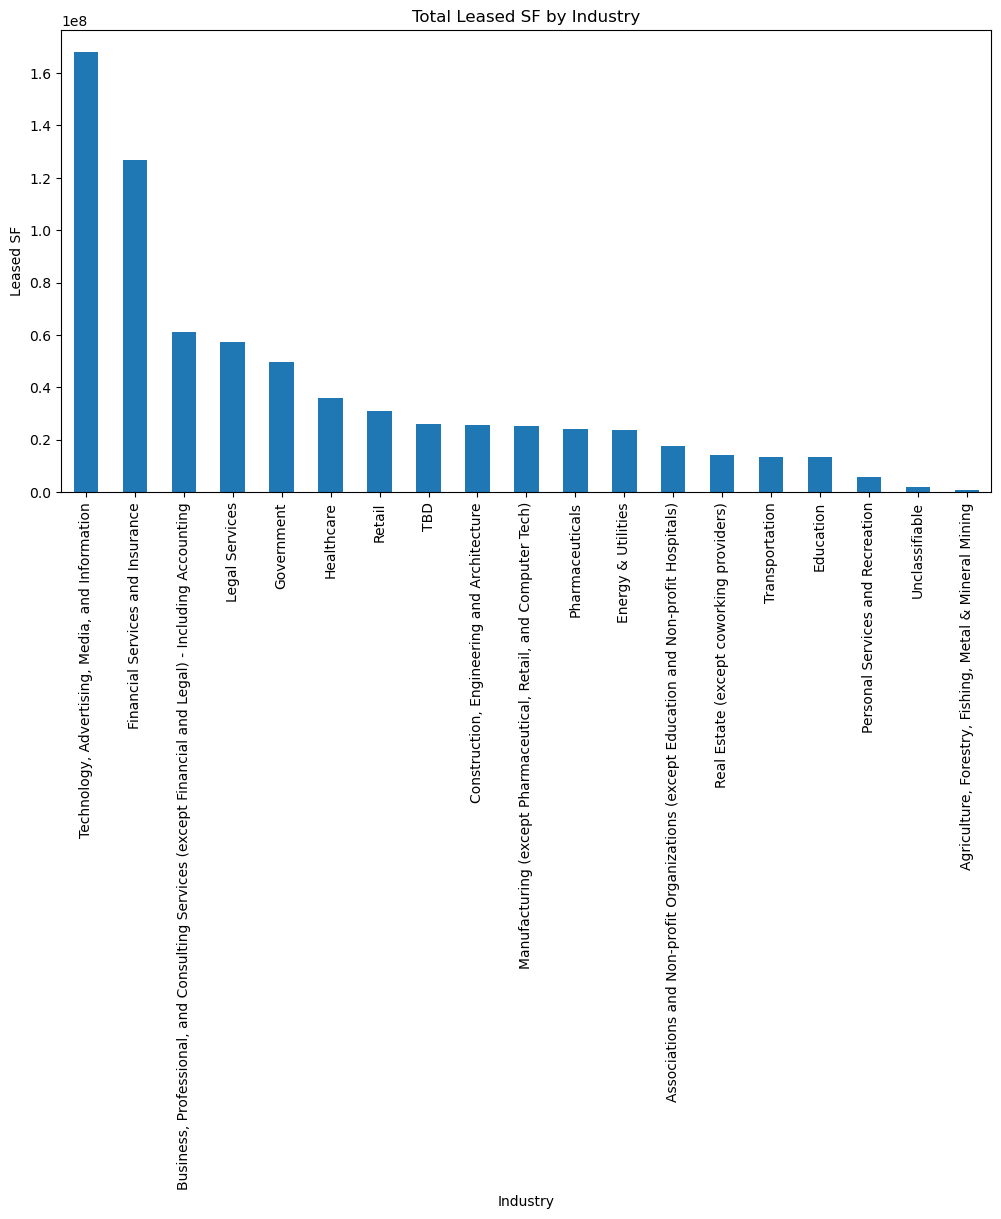

In [37]:
# Example: Total leased square footage by industry
industry_trends = focused_lease.groupby('internal_industry')['leasedSF'].sum().sort_values(ascending=False)
industry_trends.plot(kind='bar', figsize=(12, 6), title='Total Leased SF by Industry')
plt.xlabel('Industry')
plt.ylabel('Leased SF')
plt.show()


In [38]:
import folium

# Example: Map of leases
m = folium.Map(location=[focused_lease['lat'].mean(), focused_lease['lng'].mean()], zoom_start=5)
for _, row in focused_lease.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['lng']],
        radius=row['leasedSF'] / 20000,  # Scale marker size by leased square footage
        color='blue',
        fill=True,
        fill_opacity=0.3,
        popup=f"State: {row['state']}<br>Leased SF: {row['leasedSF']}"
    ).add_to(m)
m.save("leases_map.html")


In [39]:
focused_lease['internal_industry'].unique().tolist()


['Financial Services and Insurance',
 'Construction, Engineering and Architecture',
 'Technology, Advertising, Media, and Information',
 nan,
 'Manufacturing (except Pharmaceutical, Retail, and Computer Tech)',
 'Associations and Non-profit Organizations (except Education and Non-profit Hospitals)',
 'Business, Professional, and Consulting Services (except Financial and Legal) - Including Accounting',
 'Education',
 'Legal Services',
 'Personal Services and Recreation',
 'Real Estate (except coworking providers)',
 'Transportation',
 'Government',
 'TBD',
 'Energy & Utilities',
 'Healthcare',
 'Retail',
 'Agriculture, Forestry, Fishing, Metal & Mineral Mining',
 'Unclassifiable',
 'Pharmaceuticals']

In [40]:
focused_industries = [
'Financial Services and Insurance',
'Technology, Advertising, Media, and Information',
'Legal Services'
]

df = focused_lease[focused_lease['internal_industry'].isin(focused_industries)]
df.reset_index( inplace=True)

df


,index,year,quarter,month,market,building_name,building_id,address,region,city,state,zip,internal_submarket,internal_class,leasedSF,company_name,internal_industry,transaction_type,internal_market_cluster,costarID,space_type,CBD_suburban,RBA,available_space,availability_proportion,internal_class_rent,overall_rent,direct_available_space,direct_availability_proportion,direct_internal_class_rent,direct_overall_rent,sublet_available_space,sublet_availability_proportion,sublet_internal_class_rent,sublet_overall_rent,leasing,full_address,lat,lng,time,time_numeric,unemployment_rate,highlight,tax_rate,relocated
0,0,2018,Q1,1,Atlanta,10 Glenlake North Tower,Atlanta_Central Perimeter_Atlanta_10 Glenlake ...,10 Glenlake Pky NE,South,Atlanta,GA,30328.0,Central Perimeter,A,24736.0,Capital Investment Advisors,Financial Services and Insurance,Expansion,NaN,445509,Relet,Suburban,101140416.0,20239067.0,0.200109,27.655891,24.345689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1205126.0,"10 Glenlake Pky NE, Atlanta, GA 30328",33.93194,-84.38617,2018-01-01,0,4.3,Other,6.00,0.0
1,2,2018,Q1,1,Atlanta,271 17th,Atlanta_Midtown_Atlanta_271 17th_271 17th St NW,271 17th St NW,South,Atlanta,GA,30363.0,Midtown,A,15795.0,Square,"Technology, Advertising, Media, and Information",New,NaN,5993371,Relet,CBD,101140416.0,20239067.0,0.200109,27.655891,24.345689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1205126.0,"271 17th St NW, Atlanta, GA 30363",33.79147,-84.39887,2018-01-01,0,4.3,Highlight,6.00,1.0
2,4,2018,Q1,1,Atlanta,Bank of America Plaza,Atlanta_Downtown_Atlanta_Bank of America Plaza...,600 Peachtree St NE,South,Atlanta,GA,30308.0,Downtown,A,49914.0,Flexport,"Technology, Advertising, Media, and Information",Relocation,NaN,442458,Relet,CBD,101140416.0,20239067.0,0.200109,27.655891,24.345689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1205126.0,"600 Peachtree St NE, Atlanta, GA 30308",33.77094,-84.37773,2018-01-01,0,4.3,Highlight,6.00,1.0
3,9,2018,Q1,1,Atlanta,Terminus 100,Atlanta_Buckhead_Atlanta_Terminus 100_3280 Pea...,3280 Peachtree Rd NE,South,Atlanta,GA,30305.0,Buckhead,A,33000.0,Morgan Stanley,Financial Services and Insurance,Expansion,NaN,798838,Relet,CBD,101140416.0,20239067.0,0.200109,27.655891,24.345689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1205126.0,"3280 Peachtree Rd NE, Atlanta, GA 30305",33.83518,-84.38931,2018-01-01,0,4.3,Other,6.00,0.0
4,21,2018,Q1,1,Austin,Lavaca Plaza,Austin_CBD_Austin_Lavaca Plaza_504 Lavaca St,504 Lavaca St,South,Austin,TX,78701.0,CBD,A,15556.0,Credit Shop,Financial Services and Insurance,New,NaN,98002,Relet,CBD,36815073.0,4281986.0,0.116311,40.384706,36.596618,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1738905.0,"504 Lavaca St, Austin, TX 78701",30.27022,-97.74248,2018-01-01,0,4.1,Other,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7160,29473,2024,Q4,12,Southern Maryland,Bethesda Place II,Southern Maryland_Bethesda / Chevy Chase_Bethe...,7600 Wisconsin Ave,Northeast,Bethesda,MD,20814.0,Bethesda / Chevy Chase,A,10322.0,"Furey, Doolan And Abell",Legal Services,New,NaN,131591,Relet,Suburban,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"7600 Wisconsin Ave, Bethesda, MD 20814",39.00506,-77.10295,2024-12-01,83,3.1,Other,8.25,1.0
7161,29475,2024,Q4,12,Southern Maryland,CapRock,Southern Maryland_North Bethesda / Potomac_Bet...,6903 Rockledge Dr,Northeast,Bethesda,MD,20817.0,North Bethesda / Potomac,A,18074.0,NFP,Financial Services and Insurance,New,NaN,130751,Relet,Suburban,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"6903 Rockledge Dr, Bethesda, MD 20817",38.99809,-77.14919,2024-12-01,83,3.1,Other,8.25,1.0
7162,29478,2024,Q4,12,Southern Maryland,Rockville Metro Plaza I,Southern Maryland_Rockville_Rockville_Rockvill...,111 Rockville Pike,Northeast,Rockville,MD,20850.0,Rockville,A,14636.0,American Insurance Trust,Financial Services and Insurance,NaN,NaN,130927,Relet,Suburban,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [41]:
go_df = df[df['relocated'] == 1]
stay_df = df[df['relocated'] == 0]

/var/folders/7c/0mzvfvqd0yn715h26zd94pmm0000gn/T/ipykernel_10322/1546048326.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year_quarter'] = df['year'].astype(str) + '-Q' + df['quarter'].astype(str)


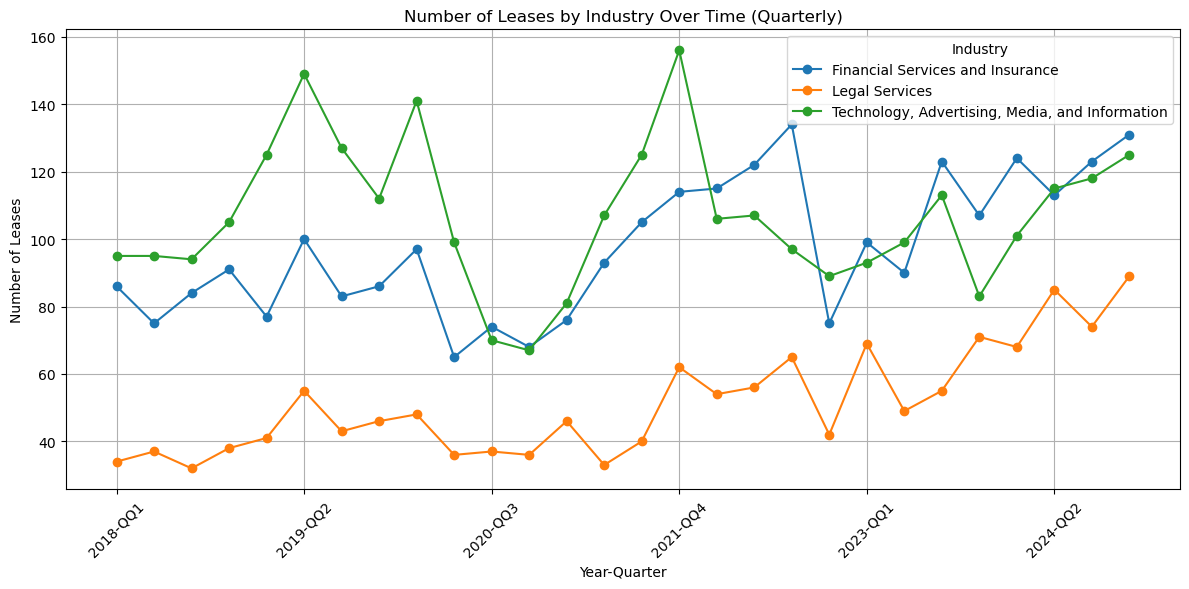

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is already defined and contains columns: 'year', 'quarter', 'internal_industry'

# Create a new column 'year_quarter' combining year and quarter
df['year_quarter'] = df['year'].astype(str) + '-Q' + df['quarter'].astype(str)

# Group by year_quarter and internal_industry to count the number of leases per quarter for each industry
lease_trends = df.groupby(['year_quarter', 'internal_industry']).size().reset_index(name='lease_count')

# Pivot the data to make it easier to plot
lease_trends_pivot = lease_trends.pivot(index='year_quarter', columns='internal_industry', values='lease_count')

# Plot the trends for each industry
lease_trends_pivot.plot(kind='line', figsize=(12, 6), marker='o')
plt.title('Number of Leases by Industry Over Time (Quarterly)')
plt.xlabel('Year-Quarter')
plt.ylabel('Number of Leases')
plt.legend(title='Industry')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()
